<a href="https://colab.research.google.com/github/SamiOmran/Chicago-Crime-Data/blob/master/Chicago_Crimes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='white-blue'> **Load Data**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import glob

folder_path = '/content/drive/MyDrive/Colab Notebooks/Project/Project 3/Data/'

crime_files = sorted(glob.glob(folder_path + '*.csv'))
df = pd.concat([pd.read_csv(f) for f in crime_files])

In [ ]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7713109 entries, 0 to 238857
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 662.0+ MB
None


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020


# <font color='white-blue'> **Clean Data**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7713109 entries, 0 to 238857
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Latitude              float64       
 11  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 662.0+ MB


In [ ]:
# df.duplicated().sum()

In [ ]:
# df.isna().sum()

In [ ]:
# df['ID'].nunique() == len(df)

In [ ]:
indexed_df = df.set_index('Date').copy()
indexed_df.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020


# <font color='white-blue'> **Stake Holders Questions**

## <font color='yellow'>Topic 1) Comparing Police Districts

In [ ]:
df_2022 = indexed_df.loc['2022']

In [ ]:
districts_2022 = df_2022['District']
val_counts = districts_2022.value_counts(ascending=False)

max_districts = val_counts.idxmax()
min_disticts = val_counts.idxmin()

In [ ]:
districts = indexed_df.groupby('District').resample('YE').size().rename('Crimes')

In [ ]:
districts

District  Date      
1.0       2001-12-31    14861
          2002-12-31    17974
          2003-12-31    17571
          2004-12-31    17579
          2005-12-31    17700
                        ...  
31.0      2018-12-31       11
          2019-12-31        7
          2020-12-31        4
          2021-12-31       15
          2022-12-31       15
Name: Crimes, Length: 507, dtype: int64

In [ ]:
crimes_2022 = districts.unstack(level=0)

crimes_2022.loc['2022']

District,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,16.0,17.0,18.0,19.0,20.0,21.0,22.0,24.0,25.0,31.0
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-31,13044.0,11793.0,11937.0,13931.0,9773.0,14694.0,10319.0,14805.0,10376.0,9961.0,...,9226.0,6997.0,12429.0,12243.0,4960.0,NaN,7671.0,8469.0,11951.0,15.0


In [ ]:
print(max_districts)
val_counts.max()

8.0


14805

In [ ]:
print(min_disticts)
val_counts.min()

31.0


15

## <font color='yellow'>Topic 2) Crimes Across the Years

### Is the total number of crimes increasing or decreasing across the years?


In [ ]:
total_crimes = indexed_df.resample('YE').size().rename('Crimes')
total_crimes.head()

,Crimes
Date,
2001-12-31,485886
2002-12-31,486807
2003-12-31,475985
2004-12-31,469422
2005-12-31,453773


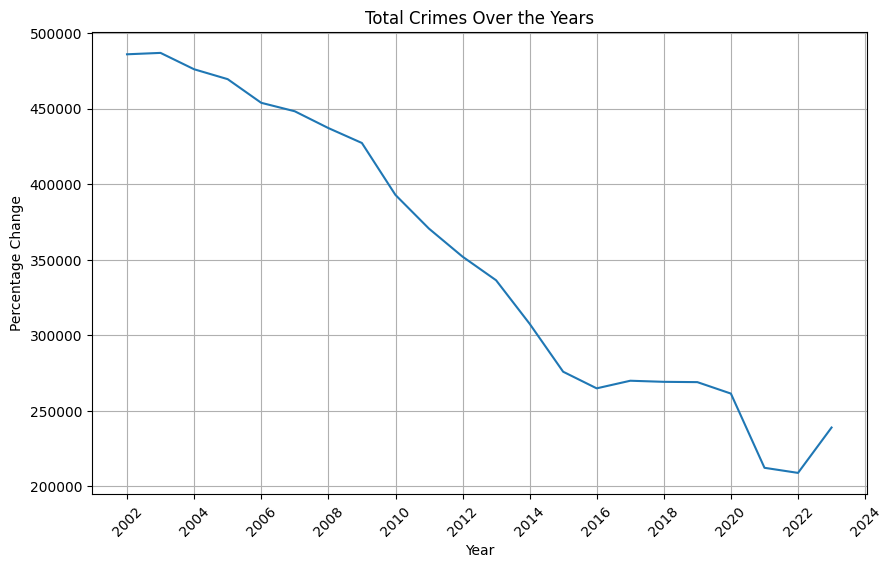

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(total_crimes)

ax.set(xlabel='Year', ylabel='Percentage Change', title='Total Crimes Over the Years')
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.grid()
plt.xticks(rotation=45);

### Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?

In [ ]:
yearly_crimes_by_type = indexed_df.groupby(indexed_df.index.year)['Primary Type'].value_counts(ascending=False).unstack()
yearly_crimes_by_type

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Date,,,,,,,,,,,,,,,,,,,,,
2001,1011.0,31384.0,93461.0,26014.0,1.0,1779.0,55859.0,29.0,13241.0,14949.0,...,29662.0,6026.0,9.0,2750.0,8.0,18441.0,2239.0,204.0,99277.0,4277.0
2002,1032.0,31523.0,94153.0,25623.0,NaN,1807.0,55941.0,27.0,13880.0,13732.0,...,32600.0,6408.0,8.0,2457.0,2.0,18523.0,2173.0,200.0,98332.0,4281.0
2003,955.0,29477.0,88380.0,25157.0,NaN,1571.0,55011.0,41.0,14807.0,13459.0,...,31148.0,6214.0,6.0,2430.0,2.0,17332.0,2078.0,247.0,98876.0,4211.0
2004,778.0,28850.0,87136.0,24564.0,NaN,1538.0,53164.0,42.0,15913.0,13255.0,...,29532.0,7476.0,9.0,2495.0,1.0,15978.0,1805.0,215.0,95463.0,4298.0
2005,691.0,27067.0,83964.0,25503.0,NaN,1521.0,54548.0,37.0,16655.0,13590.0,...,28028.0,6124.0,4.0,2730.0,2.0,16047.0,1817.0,192.0,85684.0,4106.0
2006,726.0,25945.0,80666.0,24324.0,NaN,1439.0,57124.0,47.0,14505.0,13606.0,...,27101.0,7034.0,4.0,3068.0,7.0,15968.0,1576.0,186.0,86240.0,3821.0
2007,712.0,26313.0,79593.0,24858.0,NaN,1507.0,53749.0,53.0,13699.0,14170.0,...,26863.0,6087.0,5.0,3315.0,1.0,15450.0,1529.0,213.0,85156.0,3554.0
2008,644.0,25448.0,75930.0,26218.0,NaN,1515.0,52843.0,47.0,12310.0,14933.0,...,26532.0,5141.0,4.0,3013.0,NaN,16703.0,1501.0,190.0,88437.0,3877.0
2009,616.0,22861.0,68460.0,26767.0,NaN,1401.0,47725.0,42.0,10851.0,13877.0,...,25601.0,3940.0,10.0,3147.0,NaN,15981.0,1265.0,168.0,80976.0,4159.0


In [ ]:
total_diff = total_crimes.diff()
crimes_diff = yearly_crimes_by_type.diff().sum()

In [ ]:
opposite_trends = []
for crime_type in yearly_crimes_by_type.columns:
    if (total_diff * crimes_diff[crime_type]).sum() < 0:
        opposite_trends.append(crime_type)

print("Crime types with trends opposite to overall trend:")
print(opposite_trends)

Crime types with trends opposite to overall trend:
['CONCEALED CARRY LICENSE VIOLATION', 'CRIMINAL SEXUAL ASSAULT', 'DECEPTIVE PRACTICE', 'HOMICIDE', 'HUMAN TRAFFICKING', 'NON - CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'OBSCENITY', 'OTHER NARCOTIC VIOLATION', 'STALKING', 'WEAPONS VIOLATION']


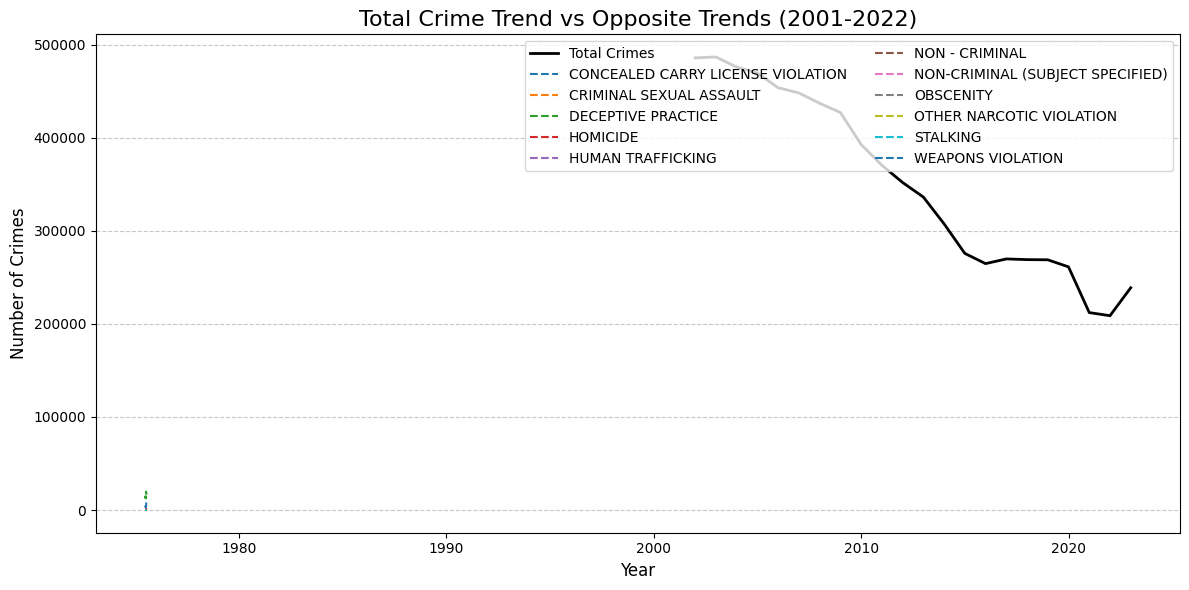

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(total_crimes.index, total_crimes.values, label='Total Crimes', color='black', linewidth=2)

for crime_type in opposite_trends:
    plt.plot(yearly_crimes_by_type.index, yearly_crimes_by_type[crime_type], label=crime_type, linestyle='--')

plt.title('Total Crime Trend vs Opposite Trends (2001-2022)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.legend(loc='upper right', fontsize=10, ncol=2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## <font color='yellow'>Topic 3) Comparing AM vs. PM Rush Hour

### Are crimes more common during AM rush hour or PM rush hour?

In [ ]:
indexed_df['Crime Hour'] = indexed_df.index.hour
indexed_df['Rush Hour (AM/PM)'] = indexed_df['Crime Hour'].apply(lambda x: 'AM' if 7 <= x <= 10 else ('PM' if 16 <= x <= 19 else 'No'))
indexed_df.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Crime Hour,Rush Hour (AM/PM)
Date,,,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,1,No
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841,13,No
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970,13,No
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032,1,No
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020,1,No


In [ ]:
rush_hour_df = indexed_df.groupby('Rush Hour (AM/PM)').resample('YE').count()['Rush Hour (AM/PM)'].unstack(level = 0)
rush_hour_df.head()

Rush Hour (AM/PM),AM,No,PM
Date,,,
2001-12-31,64397,314284,107205
2002-12-31,66274,316294,104239
2003-12-31,63333,310222,102430
2004-12-31,63196,308898,97328
2005-12-31,61318,299485,92970


In [ ]:
# rush_am = indexed_df.loc[indexed_df['Rush Hour (AM/PM)'] == 'AM']
# rush_pm = indexed_df.loc[indexed_df['Rush Hour (AM/PM)'] == 'PM']

In [ ]:
# rush_am['Primary Type'].value_counts(ascending=False)

In [ ]:
# convert values to ratios
rush_hour_df = rush_hour_df.apply(lambda x: x / x.sum() * 100, axis=1)
rush_hour_df.head()

Rush Hour (AM/PM),AM,No,PM
Date,,,
2001-12-31,13.253520,64.682662,22.063817
2002-12-31,13.614020,64.973182,21.412798
2003-12-31,13.305671,65.174743,21.519586
2004-12-31,13.462513,65.803904,20.733583
2005-12-31,13.512924,65.998858,20.488218


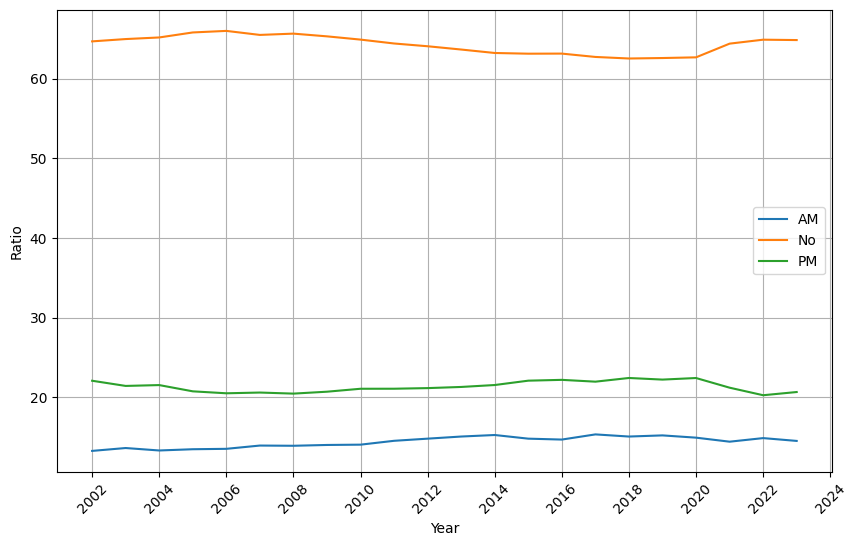

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(rush_hour_df)

ax.set_xlabel('Year')
ax.set_ylabel('Ratio')
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.legend(['AM', 'No', 'PM'])
ax.grid()
plt.xticks(rotation=45);

### What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?

In [ ]:
crimes_during_rush_hours = indexed_df.groupby(['Rush Hour (AM/PM)', 'Primary Type']).resample('YE').count()['Rush Hour (AM/PM)']
crimes_during_rush_hours

Rush Hour (AM/PM)  Primary Type       Date      
AM                 ARSON              2001-12-31      86
                                      2002-12-31     112
                                      2003-12-31      99
                                      2004-12-31      72
                                      2005-12-31      51
                                                    ... 
PM                 WEAPONS VIOLATION  2018-12-31    1216
                                      2019-12-31    1240
                                      2020-12-31    1650
                                      2021-12-31    1672
                                      2022-12-31    1865
Name: Rush Hour (AM/PM), Length: 2061, dtype: int64

In [ ]:
# Most crimes during PM rush hours
crimes_during_rush_hours.loc['PM'].unstack(level=0).sum().sort_values(ascending=False).head()

,0
Primary Type,
THEFT,379122.0
BATTERY,288003.0
CRIMINAL DAMAGE,183423.0
NARCOTICS,164754.0
ASSAULT,118179.0


In [ ]:
# crimes_during_rush_hours.loc['PM'].sort_values(ascending=False).head(10)

In [ ]:
# Most crimes during PM rush hours
crimes_during_rush_hours.loc['AM'].unstack(level=0).sum().sort_values(ascending=False).head()

,0
Primary Type,
THEFT,260759.0
BATTERY,158475.0
CRIMINAL DAMAGE,109089.0
BURGLARY,96219.0
OTHER OFFENSE,89870.0


#### Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?

In [ ]:
crimes_during_rush_hours.loc[:, 'MOTOR VEHICLE THEFT'].drop('No').unstack(level=0).sum().sort_values(ascending=False)

,0
Rush Hour (AM/PM),
PM,74678
AM,54035


## <font color='yellow'>Topic 4) Comparing Months

### What months have the most crime? What months have the least?

In [ ]:
crimes_in_month = indexed_df.resample('ME').size().sort_values(ascending = False).rename('Crimes')

In [ ]:
crimes_in_month.head()

,Crimes
Date,
2002-07-31,46013
2001-07-31,44702
2003-08-31,44270
2002-08-31,44216
2001-08-31,44040


In [ ]:
crimes_in_month.tail()

,Crimes
Date,
2021-04-30,15601
2022-01-31,15599
2022-02-28,15234
2021-02-28,13100
2020-04-30,12923


## <font color='yellow'>Topic 5) Comparing Holidays:

### What are the top 3 holidays with the largest number of crimes?

In [ ]:
from holidays import country_holidays

In [ ]:
all_days = pd.date_range(indexed_df.index.min(), indexed_df.index.max())
all_days

DatetimeIndex(['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04',
               '2001-01-05', '2001-01-06', '2001-01-07', '2001-01-08',
               '2001-01-09', '2001-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', length=8035, freq='D')

In [ ]:
# Illinois state where chicago is.
il_holidays = country_holidays('US', subdiv='IL')
il_holidays.observed = True
indexed_df['Chicago Holiday'] = [il_holidays.get(date) for date in indexed_df.index.date]

In [ ]:
indexed_df

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Crime Hour,Rush Hour (AM/PM),Chicago Holiday
Date,,,,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,1,No,New Year's Day
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841,13,No,New Year's Day
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970,13,No,New Year's Day
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032,1,No,New Year's Day
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020,1,No,New Year's Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 12:50:00,12938029,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966,12,No,None
2022-12-31 12:50:00,12937822,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669,12,No,None
2022-12-31 00:52:00,12937583,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098,0,No,None


In [ ]:
holidays_crimes_count = indexed_df.groupby(['Chicago Holiday']).size().sort_values(ascending=False).rename('Crimes')
holidays_crimes_count

,Crimes
Chicago Holiday,
New Year's Day,32725
Independence Day,22672
Labor Day,22164
Memorial Day,21125
Columbus Day,20920
Veterans Day,20418
Casimir Pulaski Day,19128
Lincoln's Birthday,18165
Martin Luther King Jr. Day,17916


### For each of the top 3 holidays with the most crime, what are the top 5 most common crimes on that holiday?

In [81]:
crime_types_top_holidays = indexed_df.groupby(['Chicago Holiday', 'Primary Type']).size().rename('crimes').sort_values(ascending = False)
crime_types_top_holidays

Chicago Holiday                       Primary Type
New Year's Day                        THEFT           6845
                                      BATTERY         6043
Independence Day                      BATTERY         5805
Memorial Day                          BATTERY         5113
Labor Day                             BATTERY         4607
                                                      ... 
Juneteenth National Independence Day  KIDNAPPING         1
Independence Day                      NON-CRIMINAL       1
Columbus Day                          NON-CRIMINAL       1
Christmas Day (observed)              OBSCENITY          1
Veterans Day (observed)               NON-CRIMINAL       1
Name: crimes, Length: 558, dtype: int64

In [127]:
crime_types_top_holidays.groupby(level=0).apply(lambda df: df[:3]).droplevel(0).to_frame().sort_values(by='crimes', ascending = False).loc['New Year\'s Day']

,crimes
Primary Type,
THEFT,6845
BATTERY,6043
CRIMINAL DAMAGE,3236


In [136]:
indexed_df.groupby(['Chicago Holiday'])['Primary Type'].value_counts(ascending = False)

Chicago Holiday        Primary Type                     
Casimir Pulaski Day    THEFT                                3992
                       BATTERY                              2904
                       NARCOTICS                            2595
                       CRIMINAL DAMAGE                      1965
                       OTHER OFFENSE                        1558
                                                            ... 
Washington's Birthday  GAMBLING                               12
                       KIDNAPPING                             11
                       INTIMIDATION                           10
                       STALKING                                9
                       CONCEALED CARRY LICENSE VIOLATION       4
Name: count, Length: 558, dtype: int64